In [1]:
# Script only for checking diagnostics (ipm histograms, time tool ampl and fltpos histograms, adu histogram, ePix100 ROI check)

import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
from pathlib import Path
from scipy.ndimage import rotate

import XSpect.XSpect_Diagnostics as dt
import psana as ps

print('-----------------')
print('Modules imported!')
print('-----------------')

-----------------
Modules imported!
-----------------


In [11]:
# run = 339
# exp = 'xcsc00121'

# keys=['epics/ccm_E','tt/ttCorr','epics/lxt_ttc', 'enc/lasDelay' , 'ipm4/sum','tt/AMPL','epix_2/ROI_0_area'] 
# names=['ccm','time_tool_correction','lxt_ttc'  ,'encoder','ipm', 'time_tool_ampl','epix']

run = 8
exp = 'mfxl1033223'

keys=['epics/ccm_E','tt/ttCorr','epics/lxt_ttc', 'enc/lasDelay' , 'ipm_dg1/sum','tt/AMPL','epix_1/ROI_0_area'] 
names=['ccm','time_tool_correction','lxt_ttc'  ,'encoder','ipm', 'time_tool_ampl','epix']

d = dt.diagnostics(run, exp, keys, names)


Run 8 imported


In [12]:
d.h5.keys()

<KeysViewHDF5 ['Sums', 'UserDataCfg', 'damage', 'ebeam', 'epics', 'epix_1', 'epix_1_env', 'epix_2', 'epix_2_env', 'event_time', 'evr', 'feeBld', 'fiducials', 'gas_detector', 'ipm_dg1', 'ipm_dg2', 'lightStatus']>

In [13]:
d.h5['epix_2'].keys()

<KeysViewHDF5 ['ROI_0_area', 'ROI_0_com', 'ROI_0_max', 'ROI_0_mean', 'ROI_0_spatial_projection_data', 'ROI_0_spectrum_projection_data', 'ROI_0_sum']>

In [5]:
d.h5['Sums'].keys()

<KeysViewHDF5 ['epix_1_calib', 'epix_1_calib_dropped', 'epix_1_calib_thresADU1', 'epix_2_calib', 'epix_2_calib_dropped', 'epix_2_calib_thresADU1']>

In [ ]:
d.h5['gas_detector'].keys()

In [ ]:
# for i in ['11','12','21','22','63','64']:
for i in ['11','12','21','22']:
    plt.plot(d.h5['gas_detector']['f_'+i+'_ENRC'][:],label=i)
plt.legend()

In [ ]:
x_ev=d.h5['scan']['mcc'][:]
fee_spec=d.h5['feeBld']['hproj'][:]
gas_det_22=d.h5['gas_detector']['f_22_ENRC'][:]

In [ ]:
spec_unique=[]
for i in np.unique(x_ev):
    index=np.nonzero(x_ev==i)[0]
    temp=np.nansum(fee_spec[index],0)
    spec_unique.append(temp)
    plt.plot(temp,label='%.1f eV'%i)
spec_unique=np.array(spec_unique)
plt.legend()

plt.figure()
plt.plot(np.nansum(fee_spec,0))

In [ ]:
spec_unique_n=[]
for i in np.unique(x_ev):
    index=np.nonzero(x_ev==i)[0]
    temp=np.nansum(fee_spec[index],0)
    i0_temp=np.nansum(gas_det_22[index],0)
    spec_unique_n.append(temp/i0_temp)
    plt.plot(temp/i0_temp,label='%.1f eV'%i)
spec_unique_n=np.array(spec_unique_n)
plt.legend()

plt.figure()
plt.plot(np.nansum(fee_spec,0)/np.nansum(gas_det_22,0))

In [ ]:
spec_unique_n=[]
for i in np.unique(x_ev):
    index=np.nonzero(x_ev==i)[0]
    temp=np.nansum(fee_spec[index],0)
    i0_temp=np.nansum(gas_det_22[index],0)
    spec_unique_n.append(temp/i0_temp)
    plt.plot(temp/i0_temp,label='%.1f eV'%i)
spec_unique_n=np.array(spec_unique_n)
plt.legend()

plt.figure()
plt.plot(np.nansum(fee_spec,0)/np.nansum(gas_det_22,0))

In [ ]:
d.h5['feeBld']['hproj'][:].shape

In [ ]:
d.h5['feeBld'].keys()
#d.h5['UserDataCfg']['epix_2']['ROI_0__ROI_0_ROI'][:]

In [ ]:
plt.imshow(fee_spec,aspect='auto')

In [ ]:
meanfee = np.nanmean(fee_spec,axis=0)
plt.plot(meanfee)

In [ ]:
d.h5['epix_2'].keys()

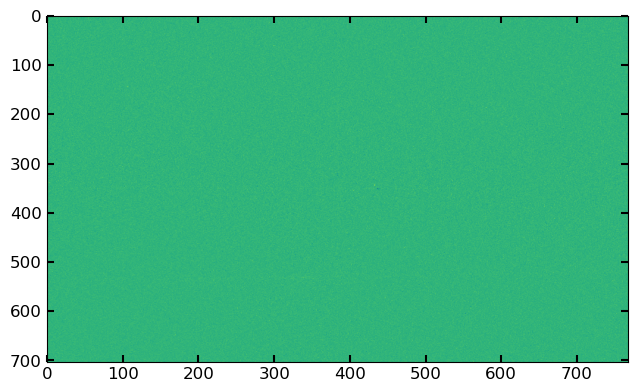

In [7]:
plt.imshow(d.h5['Sums']['epix_1_calib'][:],aspect='auto') #run 13

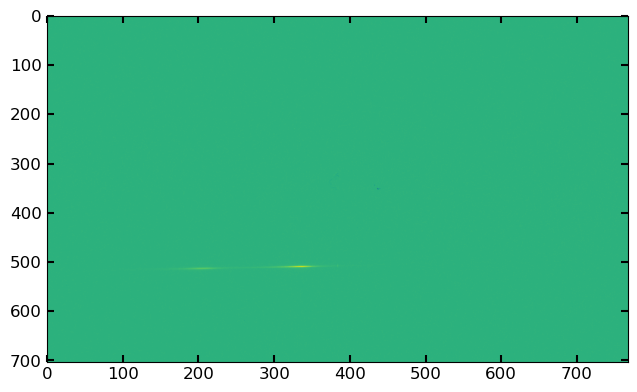

In [14]:
plt.imshow(d.h5['Sums']['epix_1_calib'][:],aspect='auto')

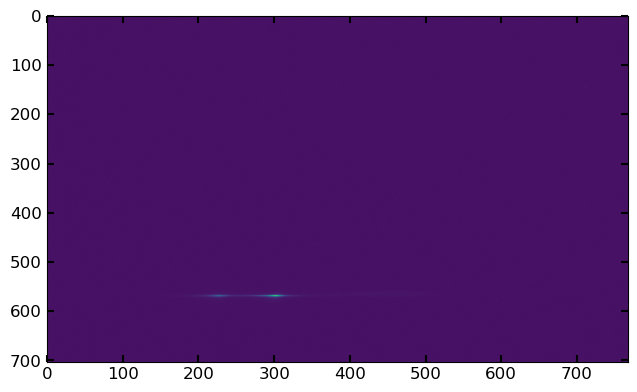

In [9]:
plt.imshow(d.h5['Sums']['epix_2_calib'][:],aspect='auto') #run 13

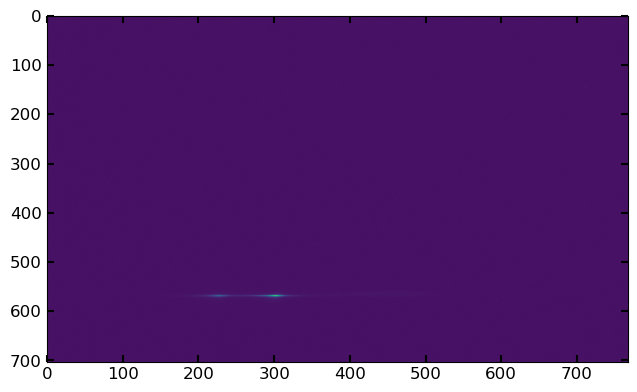

In [10]:
#epix_2d = np.nanmean(d.h5['epix_1']['ROI_0_area'][:],axis=0)
plt.imshow(d.h5['Sums']['epix_2_calib'][:],aspect='auto')

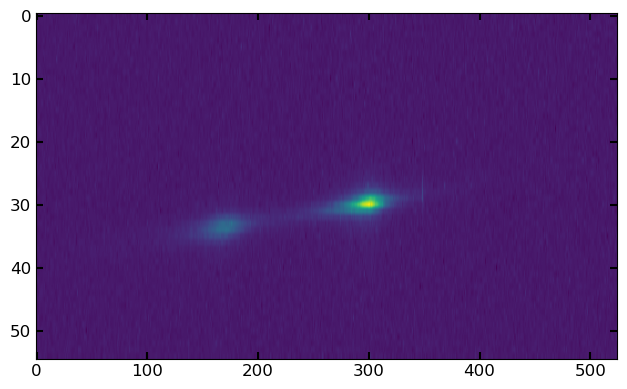

In [15]:
epix_2d = np.nanmean(d.h5['epix_1']['ROI_0_area'][:],axis=0) # run 13
plt.imshow(epix_2d,aspect='auto')

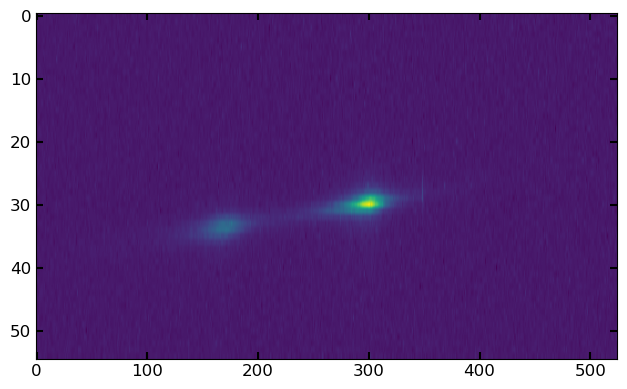

In [6]:
epix_2d = np.nanmean(d.h5['epix_1']['ROI_0_area'][:],axis=0)
plt.imshow(epix_2d,aspect='auto')

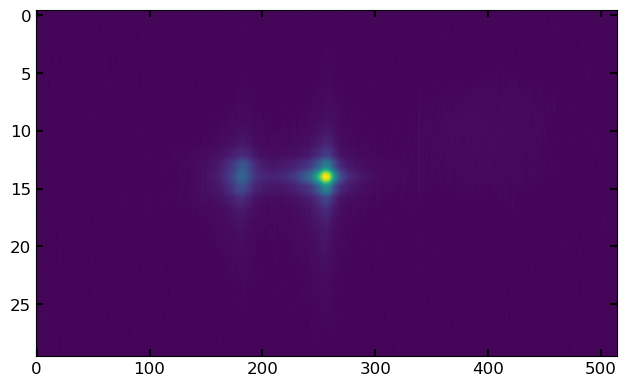

In [5]:
epix_2d = np.nanmean(d.h5['epix_2']['ROI_0_area'][:],axis=0)
plt.imshow(epix_2d,aspect='auto')

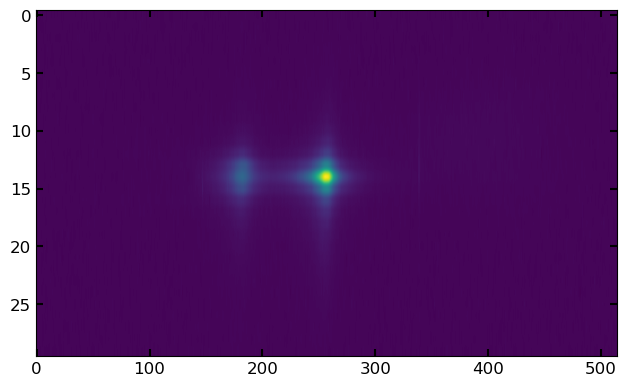

In [12]:
epix_2d = np.nanmean(d.h5['epix_2']['ROI_0_area'][:],axis=0) # run 13
plt.imshow(epix_2d,aspect='auto')

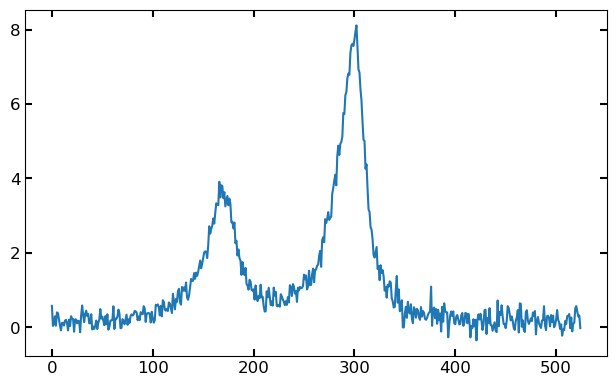

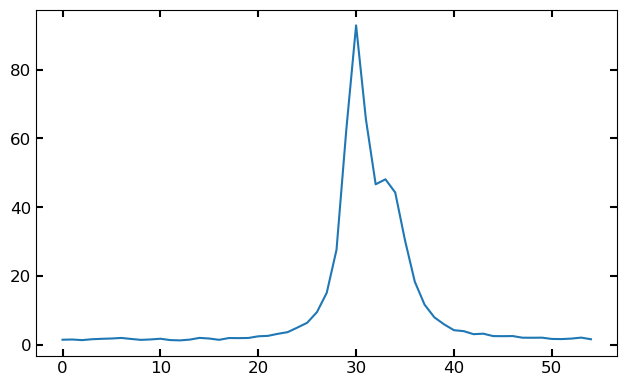

In [17]:
plt.plot(np.nanmean(d.h5['epix_1']['ROI_0_spectrum_projection_data'][:],axis=0))
plt.figure()
plt.plot(np.nanmean(d.h5['epix_1']['ROI_0_spatial_projection_data'][:],axis=0))

In [ ]:
plt.plot(np.nanmean(d.h5['epix_1']['ROI_0_spectrum_projection_data'][:],axis=0))
plt.figure()
plt.plot(np.nanmean(d.h5['epix_1']['ROI_0_spatial_projection_data'][:],axis=0))

In [ ]:
d.datadict

In [ ]:
nshots = 1000
thresholds = [3]

d.adu_histogram(nshots, thresholds)

In [ ]:
ipm_thres = [10000]

d.ipm_histogram(ipm_thres)

In [ ]:
#tt_thres = [0.01, 0.1]

#d.ttAMPL_histogram(tt_thres)

In [ ]:
nshots = 1000
# ka_roi = [120, 140]
kb_roi = [100, 400]
#fe_kb_roi = [40,60]

d.xes_ROI(nshots, kb_limits = kb_roi)


In [ ]:
#nshots = 1000
# ka_roi = [120, 140]
#kb_roi = [140, 155]
#fe_kb_roi = [40,60]

#d.xes_ROI(nshots, kb_limits = kb_roi)


In [ ]:
nshots = 1000
h_lims = [40, 160]
v_lims = [150, 400]

d.xas_ROI(nshots, horiz_limits = h_lims, vert_limits = v_lims)